In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import scipy.misc

%matplotlib inline

1080 1
540.0 2


TypeError: slice indices must be integers or None or have an __index__ method

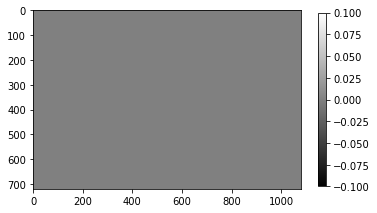

In [7]:
def stripe_generator(n, height, width):
    n_stripes = 1
    w = width
    for j in range(n):
        print(w, n_stripes)
        img = np.zeros(shape=(height,width), dtype='uint8')
        
        for i in range(n_stripes):
            if i % 2 == 1:
                img[:,i*w:(i+1)*w] = 255
        w = w / 2
        n_stripes = n_stripes * 2
        
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.colorbar(shrink=0.8)

        im = Image.fromarray(img)
        im.save("n" + str(j) + ".jpg")
    return

stripe_generator(9, 720, 1080)

In [2]:
from scipy.linalg import hadamard
hadamard(8)

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [ 1,  1, -1, -1,  1,  1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1]])

[1 1 1 1 1 1 1 1]
[ 1 -1  1 -1  1 -1  1 -1]
[ 1  1 -1 -1  1  1 -1 -1]
[ 1 -1 -1  1  1 -1 -1  1]
[ 1  1  1  1 -1 -1 -1 -1]
[ 1 -1  1 -1 -1  1 -1  1]
[ 1  1 -1 -1 -1 -1  1  1]
[ 1 -1 -1  1 -1  1  1 -1]


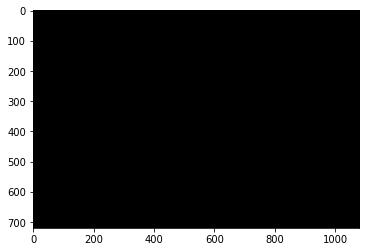

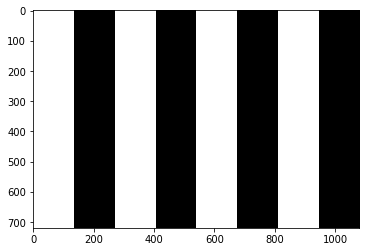

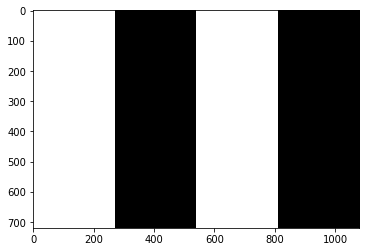

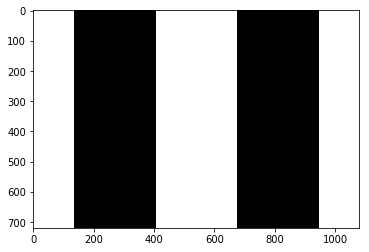

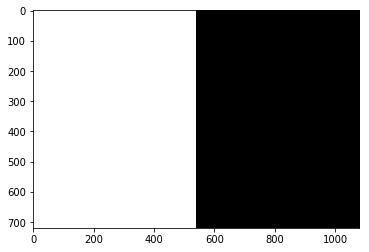

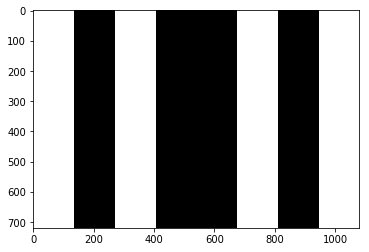

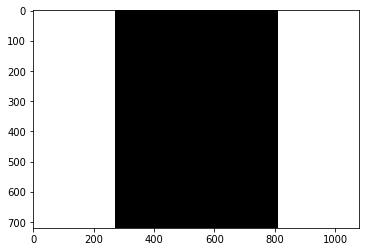

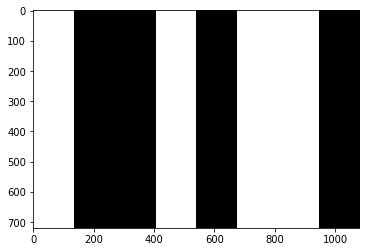

In [8]:
# n must be a power of 2
def walsh_generator(n, height, width):
    H = hadamard(n)
    w = int(width/n)
    
    for i in range(n):
        print(H[i])
        img = np.zeros(shape=(height,width), dtype='uint8')
        
        for j in range(n):
            if H[i, j] == 1:
                img[:,j*w:(j+1)*w] = 255
        
        plt.figure()
        plt.imshow(img, cmap='gray')
        
        im = Image.fromarray(img)
        im.save("m" + str(i) + ".jpg")
    return

walsh_generator(8, 720, 1080)

264 33 8
[1 1 1 1 1 1 1 1]
[ 1 -1  1 -1  1 -1  1 -1]
[ 1  1 -1 -1  1  1 -1 -1]
[ 1 -1 -1  1  1 -1 -1  1]
[ 1  1  1  1 -1 -1 -1 -1]
[ 1 -1  1 -1 -1  1 -1  1]
[ 1  1 -1 -1 -1 -1  1  1]
[ 1 -1 -1  1 -1  1  1 -1]


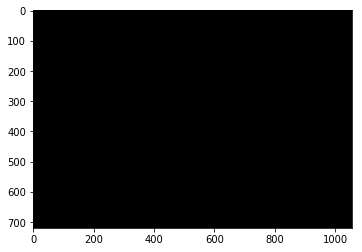

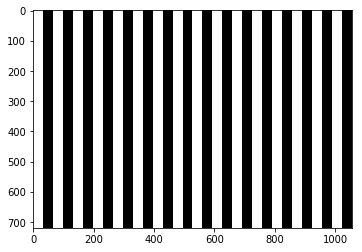

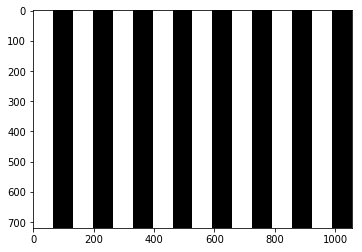

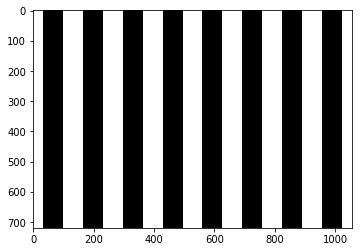

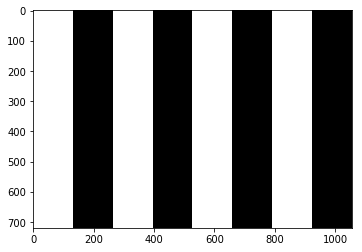

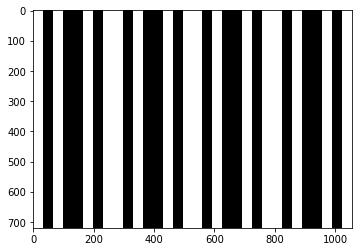

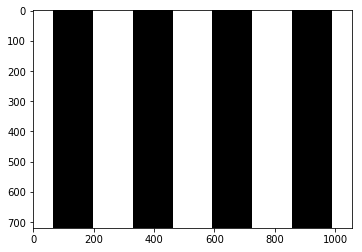

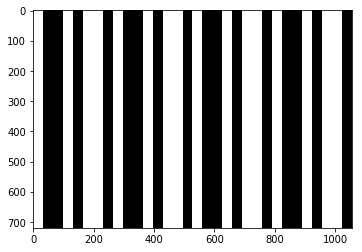

In [3]:
from scipy.linalg import hadamard
hadamard(8)

# n must be a power of 2
def walsh_generator(n, height, width, repeat):
    width_new = int(width / repeat)
    H = hadamard(n)
    w = int(width_new/n)
    width_new = w*n
    width = width_new*repeat
    print(width_new, w, n)
    
    for i in range(n):
        print(H[i])
        img = np.zeros(shape=(height,width), dtype='uint8')
        
        for j in range(n):
            if H[i, j] == 1:
                img[:,j*w:(j+1)*w] = 255
        
        for j in range(repeat):
            img[:,j*width_new:(j+1)*width_new] = img[:,:width_new]
        plt.figure()
        plt.imshow(img, cmap='gray')
        
        im = Image.fromarray(img)
        im.save("m" + str(i) + ".jpg")
#     for i in range(repeat):
#         img[:, width_new*i] = 125
#         plt.figure()
#         plt.imshow(img, cmap='gray')
    return

walsh_generator(8, 720, 1080,4)

In [12]:
height = 720
width = 1080

A_codes = np.zeros(shape=(height,width), dtype='uint8')
B_codes = np.zeros(shape=(height,width), dtype='uint8')
for i in range(height):
    for j in range(width):
        A_weights = np.dot(codes, A[:test_n,i,j])
        B_weights = np.dot(codes, B[:test_n,i,j])
        
        A_codes[i,j] = np.argmax(A_weights[1:])
        B_codes[i,j] = np.argmax(B_weights[1:])

show(A_codes)
show(B_codes)

NameError: name 'codes' is not defined